<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/FMT_concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required libraries

In [29]:
!pip install pandas==0.24.0
!pip install sklearn -U

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [0]:
from google.colab import  drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import itertools
from sklearn.preprocessing import StandardScaler,scale,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

In [31]:
drive.mount('./data')

Drive already mounted at ./data; to attempt to forcibly remount, call drive.mount("./data", force_remount=True).


In [0]:
conc = pd.read_csv('./data/My Drive/ML_training/concrete.csv')

In [33]:
conc

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [34]:
nullsFields = round((conc.isnull().sum() / len(conc) ) * 100, 2)
nullsFields

cement          0.0
slag            0.0
ash             0.0
water           0.0
superplastic    0.0
coarseagg       0.0
fineagg         0.0
age             0.0
strength        0.0
dtype: float64

# Univariat Analysis

In [35]:
desc = conc.describe()
print(conc.info())
print('='*60)
desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


============================== cement ===================================


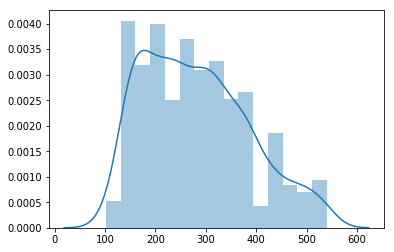

============================== slag ===================================


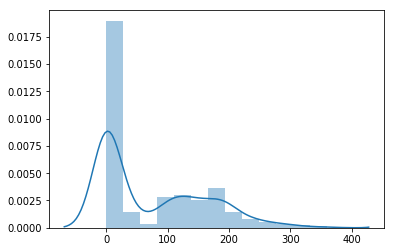

============================== ash ===================================


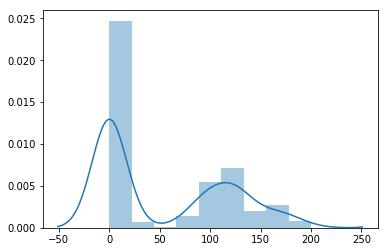

============================== water ===================================


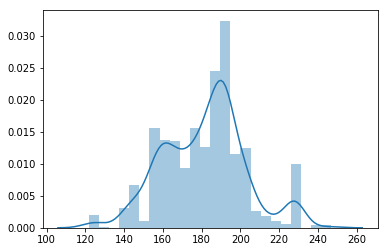

============================== superplastic ===================================


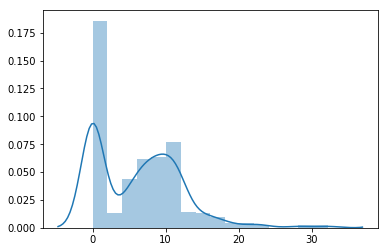

============================== coarseagg ===================================


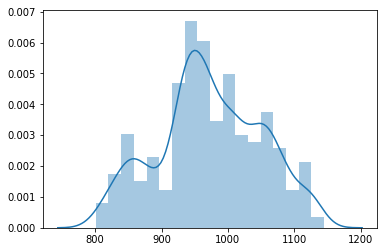

============================== fineagg ===================================


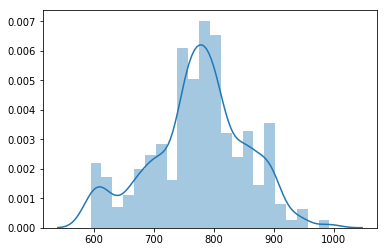

============================== age ===================================


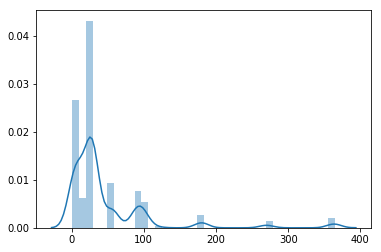

============================== strength ===================================


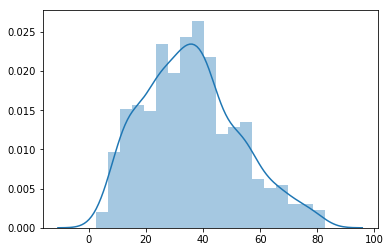

In [36]:
for i, col in enumerate(conc.columns):
  print('============================== {} ==================================='.format(col))
  ### Univariate analysis
  plt.figure(i)
  sns.distplot(conc[col].values) # numeric
  plt.show()

============================== cement ===================================


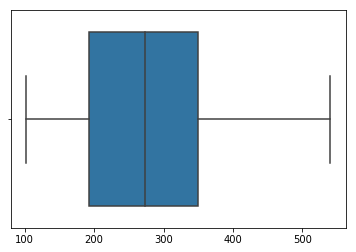

============================== slag ===================================


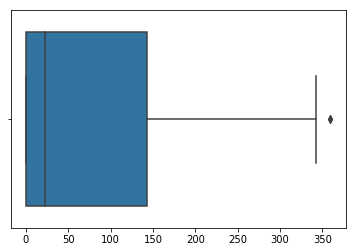

============================== ash ===================================


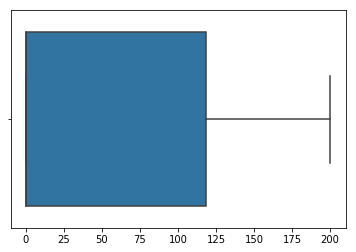

============================== water ===================================


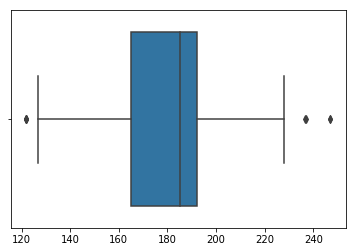

============================== superplastic ===================================


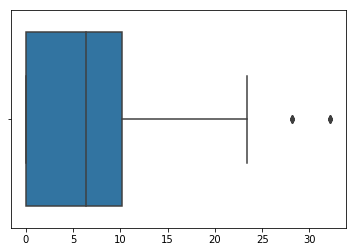

============================== coarseagg ===================================


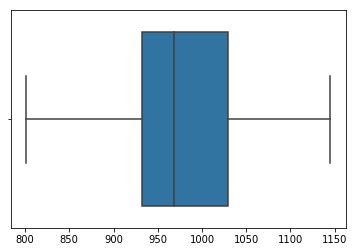

============================== fineagg ===================================


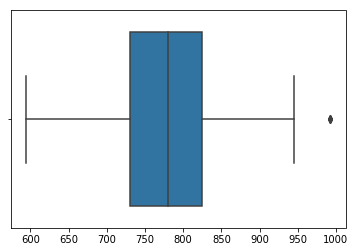

============================== age ===================================


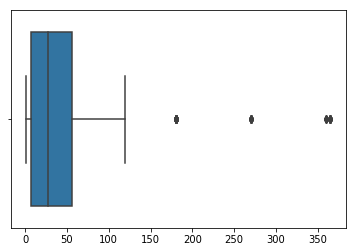

============================== strength ===================================


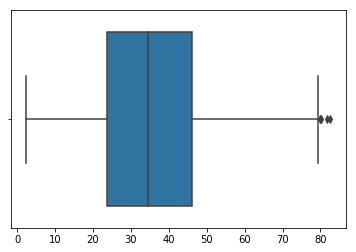

In [37]:
for i, col in enumerate(conc.columns):
  print('============================== {} ==================================='.format(col))
  ### Univariate analysis
  plt.figure(i)
  sns.boxplot(conc[col].values) # numeric
  plt.show()

============================== cement ===================================


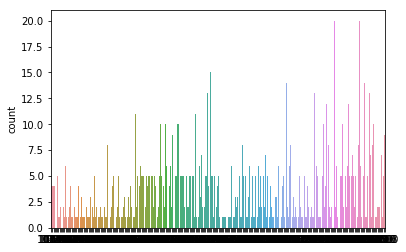

============================== slag ===================================


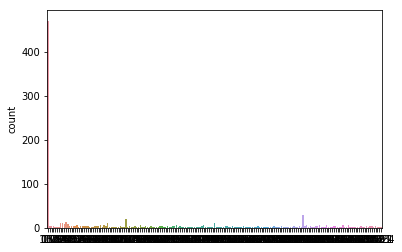

============================== ash ===================================


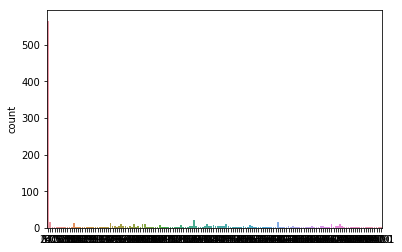

============================== water ===================================


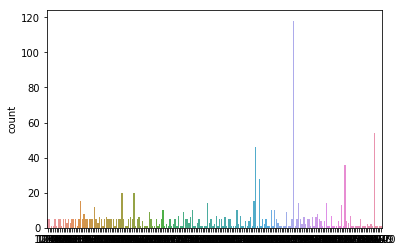

============================== superplastic ===================================


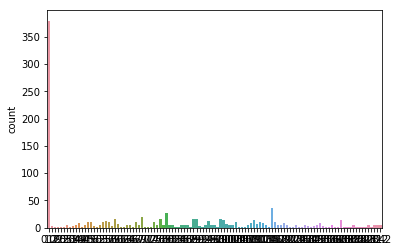

============================== coarseagg ===================================


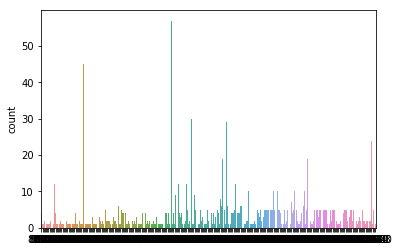

============================== fineagg ===================================


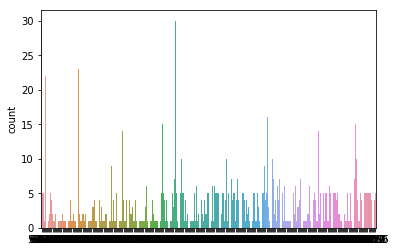

============================== age ===================================


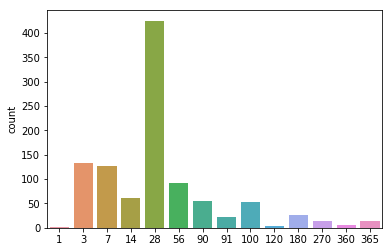

============================== strength ===================================


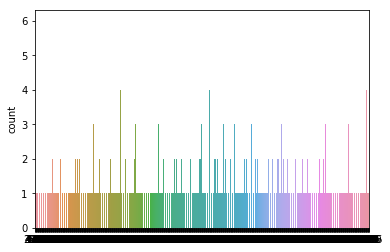

In [38]:
for i, col in enumerate(conc.columns):
  print('============================== {} ==================================='.format(col))
  ### Univariate analysis
  plt.figure(i)
  sns.countplot(conc[col].values)
  plt.show()

In [39]:
colu = conc.columns
for i, col in enumerate(colu):
  print('============================== {} ==================================='.format(col)) 
  X = conc[col] ## X usually means our input variables (or independent variables)
  y = conc["strength"] ## Y usually means our output/dependent variable
  # Note the difference in argument order
  model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
  predictions = model.predict(X)

  # Print out the statistics
  print(model.summary())

============================== cement ===================================
                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              5909.
Date:                Fri, 13 Sep 2019   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -4265.7
No. Observations:                1030   AIC:                                      8533.
Df Residuals:                    1029   BIC:                                      8538.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t   

# Bivariate Analysis

In [40]:
possible_cases = list(itertools.combinations(colu[:-1], 2))
print(possible_cases)

[('cement', 'slag'), ('cement', 'ash'), ('cement', 'water'), ('cement', 'superplastic'), ('cement', 'coarseagg'), ('cement', 'fineagg'), ('cement', 'age'), ('slag', 'ash'), ('slag', 'water'), ('slag', 'superplastic'), ('slag', 'coarseagg'), ('slag', 'fineagg'), ('slag', 'age'), ('ash', 'water'), ('ash', 'superplastic'), ('ash', 'coarseagg'), ('ash', 'fineagg'), ('ash', 'age'), ('water', 'superplastic'), ('water', 'coarseagg'), ('water', 'fineagg'), ('water', 'age'), ('superplastic', 'coarseagg'), ('superplastic', 'fineagg'), ('superplastic', 'age'), ('coarseagg', 'fineagg'), ('coarseagg', 'age'), ('fineagg', 'age')]


In [41]:
for col in possible_cases:
  print('============================== {} ==================================='.format(col)) 
  X = conc[list(col)] ## X usually means our input variables (or independent variables)
  y = conc["strength"] ## Y usually means our output/dependent variable
  # Note the difference in argument order
  model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
  predictions = model.predict(X)

  # Print out the statistics
  print(model.summary())

============================== ('cement', 'slag') ===================================
                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              3705.
Date:                Fri, 13 Sep 2019   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -4164.4
No. Observations:                1030   AIC:                                      8333.
Df Residuals:                    1028   BIC:                                      8343.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err  

============================== ('cement', 'slag') ===================================


<Figure size 432x288 with 0 Axes>

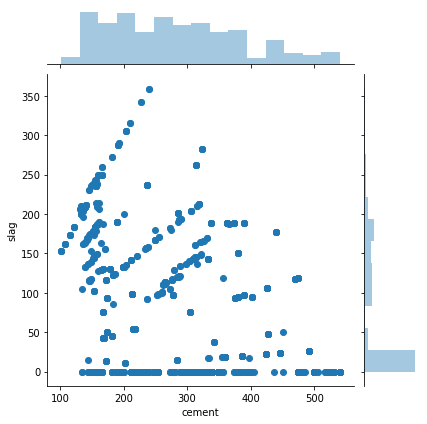

============================== ('cement', 'ash') ===================================


<Figure size 432x288 with 0 Axes>

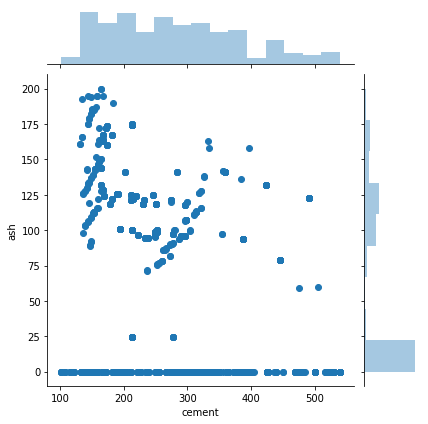

============================== ('cement', 'water') ===================================


<Figure size 432x288 with 0 Axes>

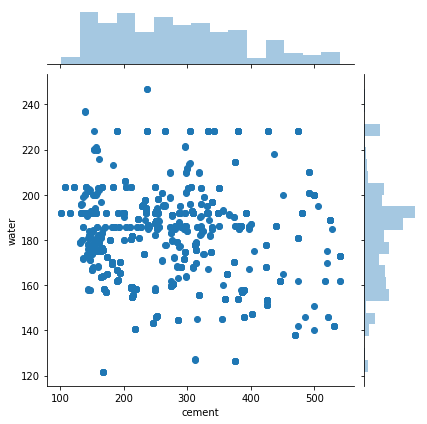

============================== ('cement', 'superplastic') ===================================


<Figure size 432x288 with 0 Axes>

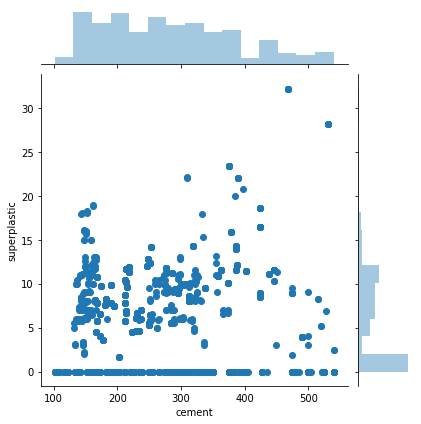

============================== ('cement', 'coarseagg') ===================================


<Figure size 432x288 with 0 Axes>

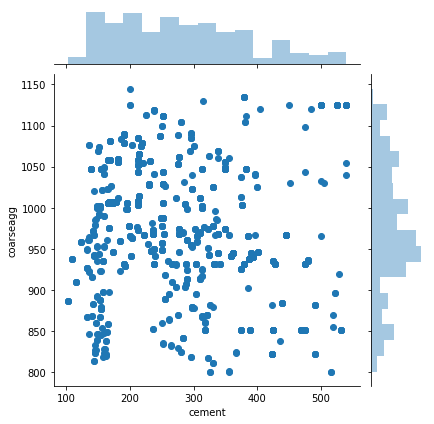

============================== ('cement', 'fineagg') ===================================


<Figure size 432x288 with 0 Axes>

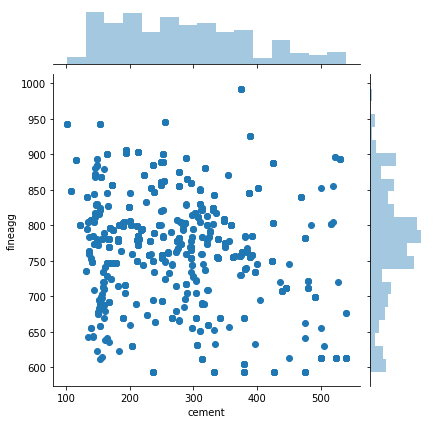

============================== ('cement', 'age') ===================================


<Figure size 432x288 with 0 Axes>

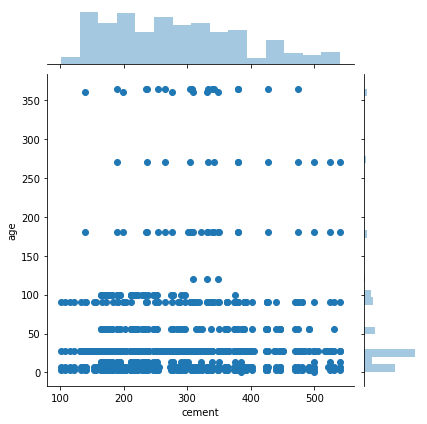

============================== ('slag', 'ash') ===================================


<Figure size 432x288 with 0 Axes>

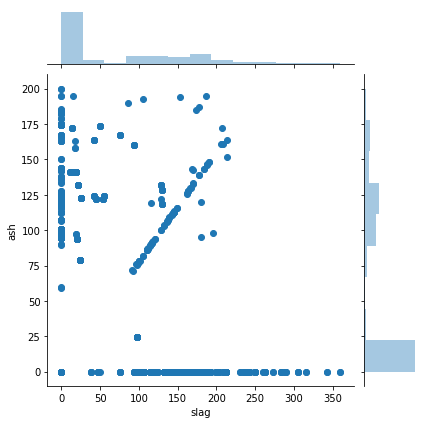

============================== ('slag', 'water') ===================================


<Figure size 432x288 with 0 Axes>

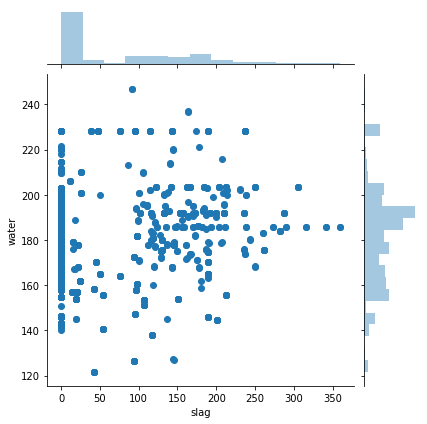

============================== ('slag', 'superplastic') ===================================


<Figure size 432x288 with 0 Axes>

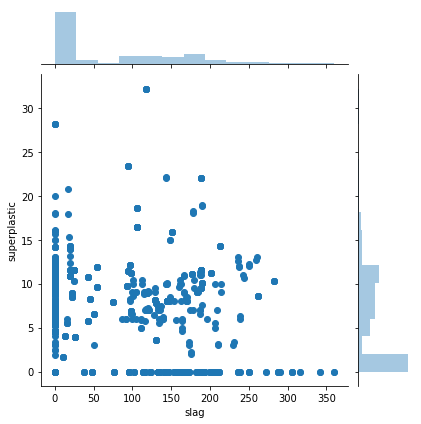

============================== ('slag', 'coarseagg') ===================================


<Figure size 432x288 with 0 Axes>

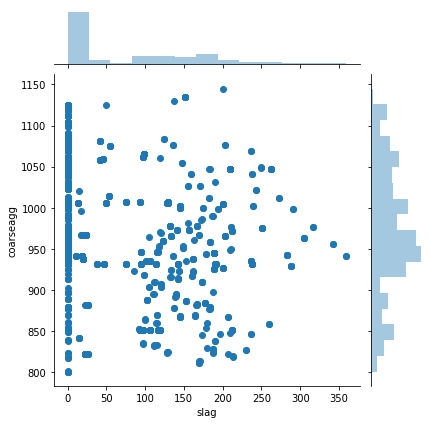

============================== ('slag', 'fineagg') ===================================


<Figure size 432x288 with 0 Axes>

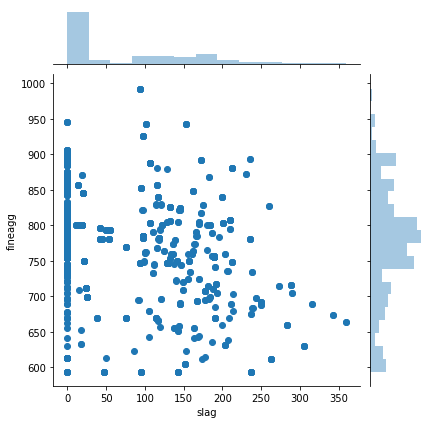

============================== ('slag', 'age') ===================================


<Figure size 432x288 with 0 Axes>

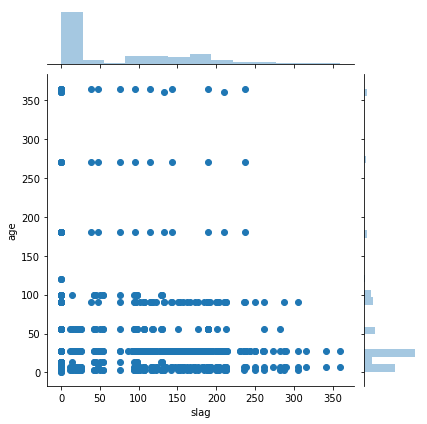

============================== ('ash', 'water') ===================================


<Figure size 432x288 with 0 Axes>

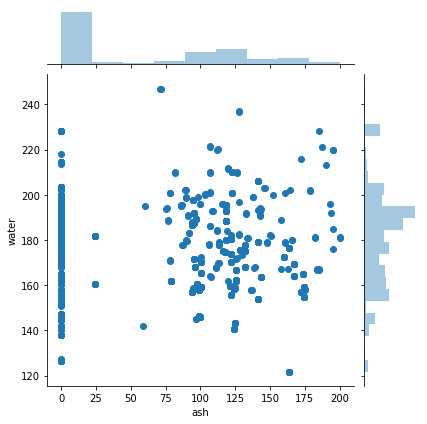

============================== ('ash', 'superplastic') ===================================


<Figure size 432x288 with 0 Axes>

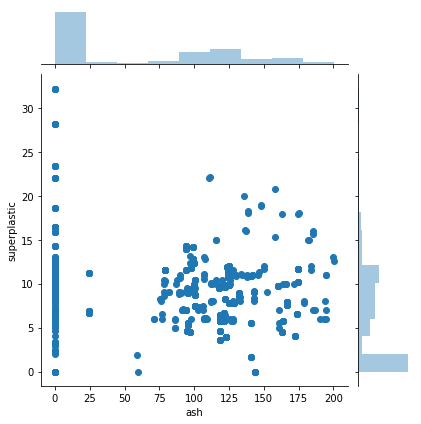

============================== ('ash', 'coarseagg') ===================================


<Figure size 432x288 with 0 Axes>

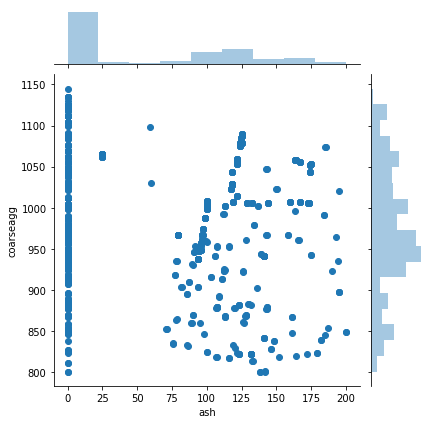

============================== ('ash', 'fineagg') ===================================


<Figure size 432x288 with 0 Axes>

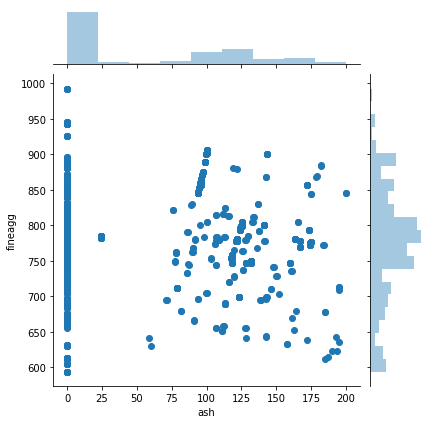

============================== ('ash', 'age') ===================================


<Figure size 432x288 with 0 Axes>

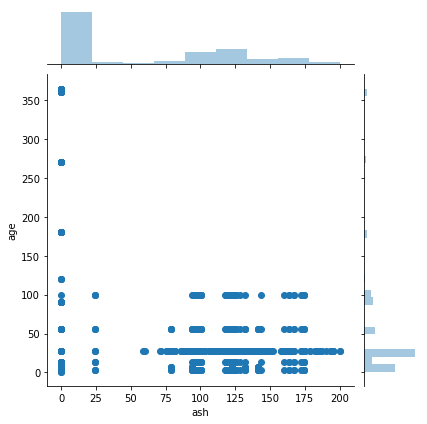

============================== ('water', 'superplastic') ===================================


<Figure size 432x288 with 0 Axes>

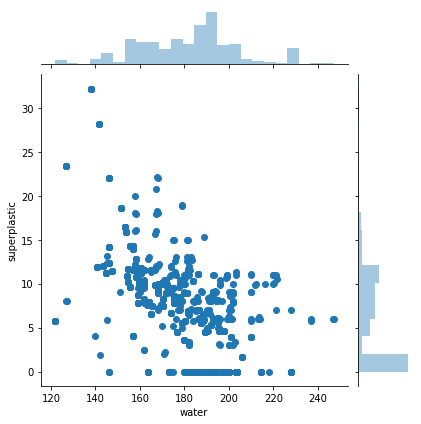

============================== ('water', 'coarseagg') ===================================


<Figure size 432x288 with 0 Axes>

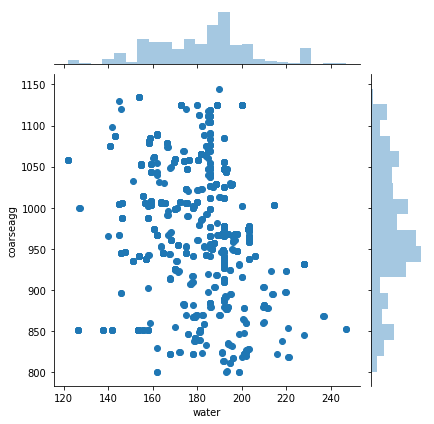

============================== ('water', 'fineagg') ===================================


<Figure size 432x288 with 0 Axes>

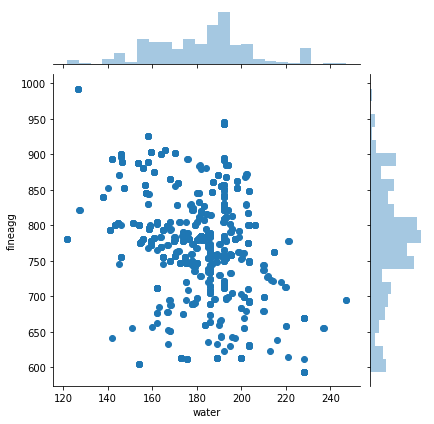

============================== ('water', 'age') ===================================


<Figure size 432x288 with 0 Axes>

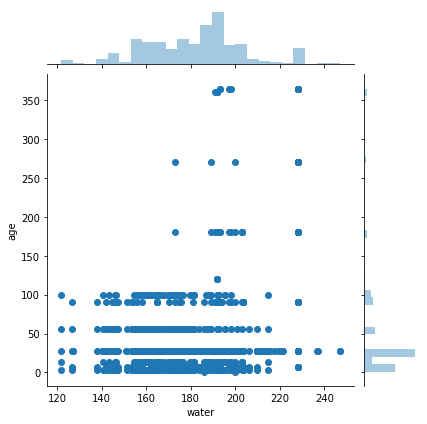

============================== ('superplastic', 'coarseagg') ===================================


<Figure size 432x288 with 0 Axes>

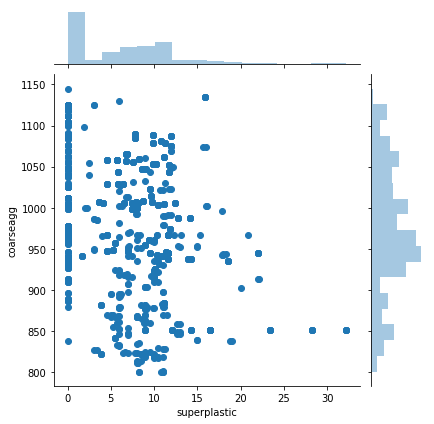

============================== ('superplastic', 'fineagg') ===================================


<Figure size 432x288 with 0 Axes>

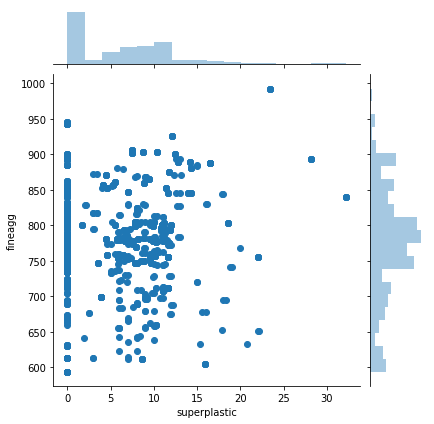

============================== ('superplastic', 'age') ===================================


<Figure size 432x288 with 0 Axes>

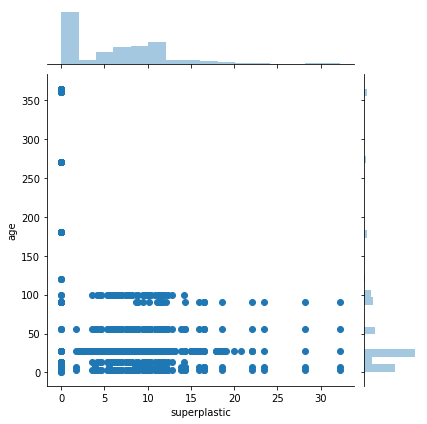

============================== ('coarseagg', 'fineagg') ===================================


<Figure size 432x288 with 0 Axes>

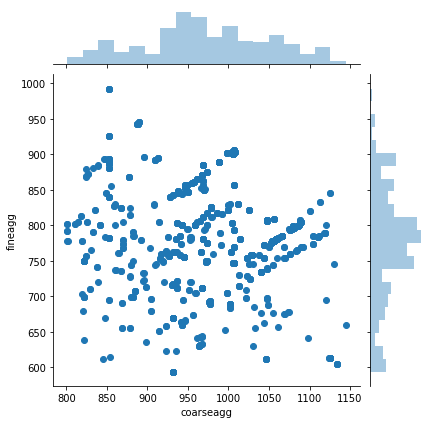

============================== ('coarseagg', 'age') ===================================


<Figure size 432x288 with 0 Axes>

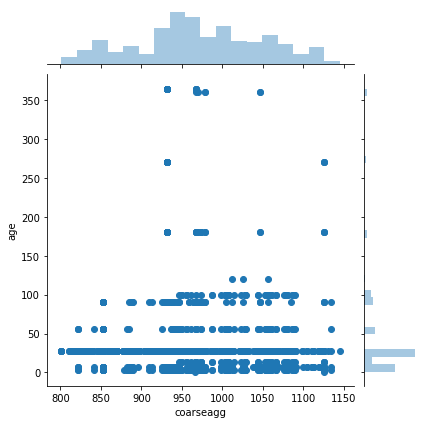

============================== ('fineagg', 'age') ===================================


<Figure size 432x288 with 0 Axes>

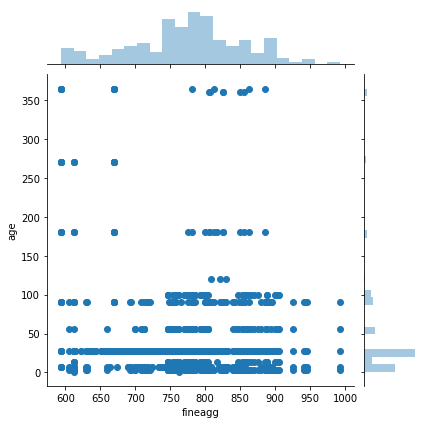

In [42]:
for i ,col in enumerate(possible_cases):
  print('============================== {} ==================================='.format(col)) 
  plt.figure(i)
  sns.jointplot(col[0],col[1],data=conc, kind='scatter')
  plt.show()
  

============================== cement ===================================


<Figure size 432x288 with 0 Axes>

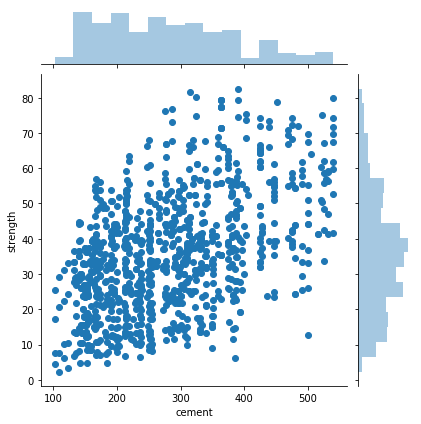

============================== slag ===================================


<Figure size 432x288 with 0 Axes>

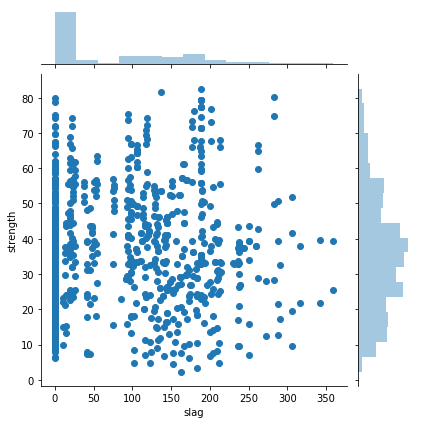

============================== ash ===================================


<Figure size 432x288 with 0 Axes>

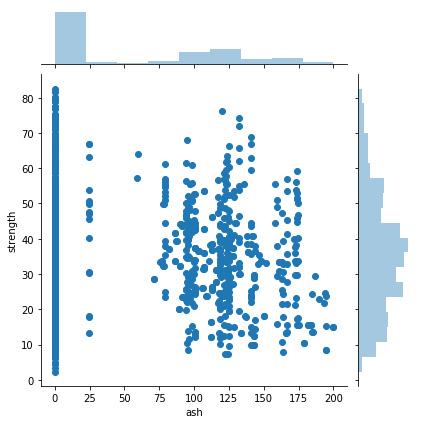

============================== water ===================================


<Figure size 432x288 with 0 Axes>

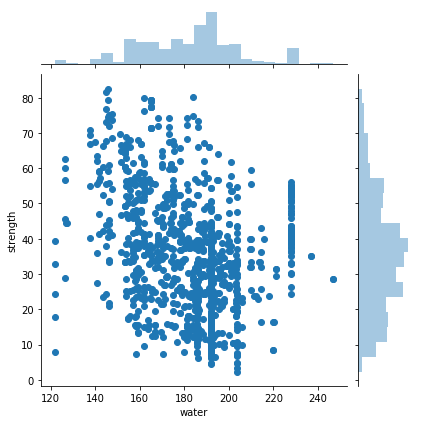

============================== superplastic ===================================


<Figure size 432x288 with 0 Axes>

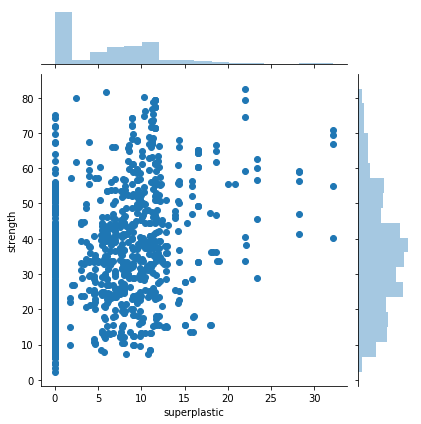

============================== coarseagg ===================================


<Figure size 432x288 with 0 Axes>

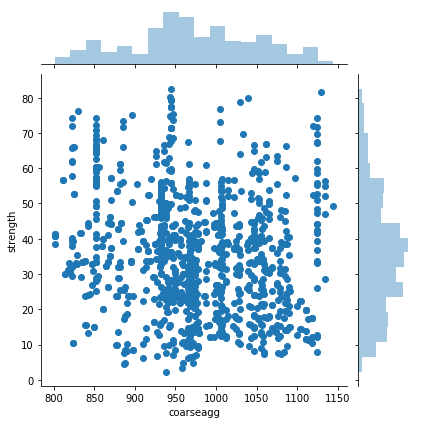

============================== fineagg ===================================


<Figure size 432x288 with 0 Axes>

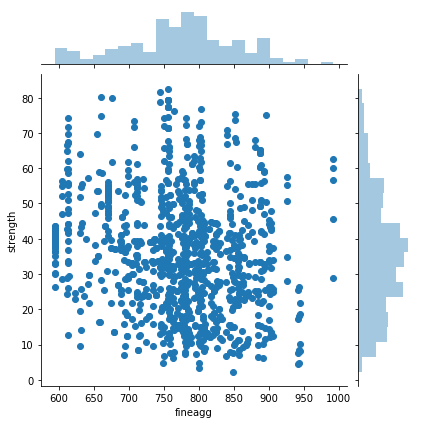

============================== age ===================================


<Figure size 432x288 with 0 Axes>

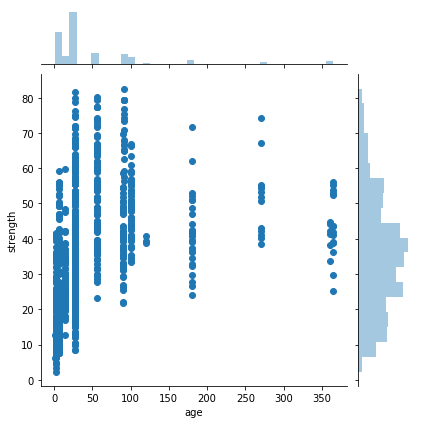

============================== strength ===================================


<Figure size 432x288 with 0 Axes>

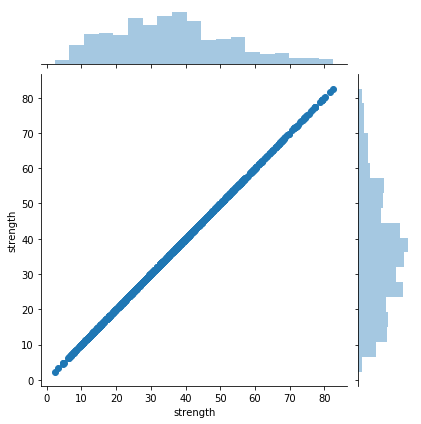

In [43]:
for i ,col in enumerate(colu):
  print('============================== {} ==================================='.format(col)) 
  plt.figure(i)
  sns.jointplot(col,'strength',data=conc, kind='scatter')
  plt.show()
  

# Multivariate Analysis

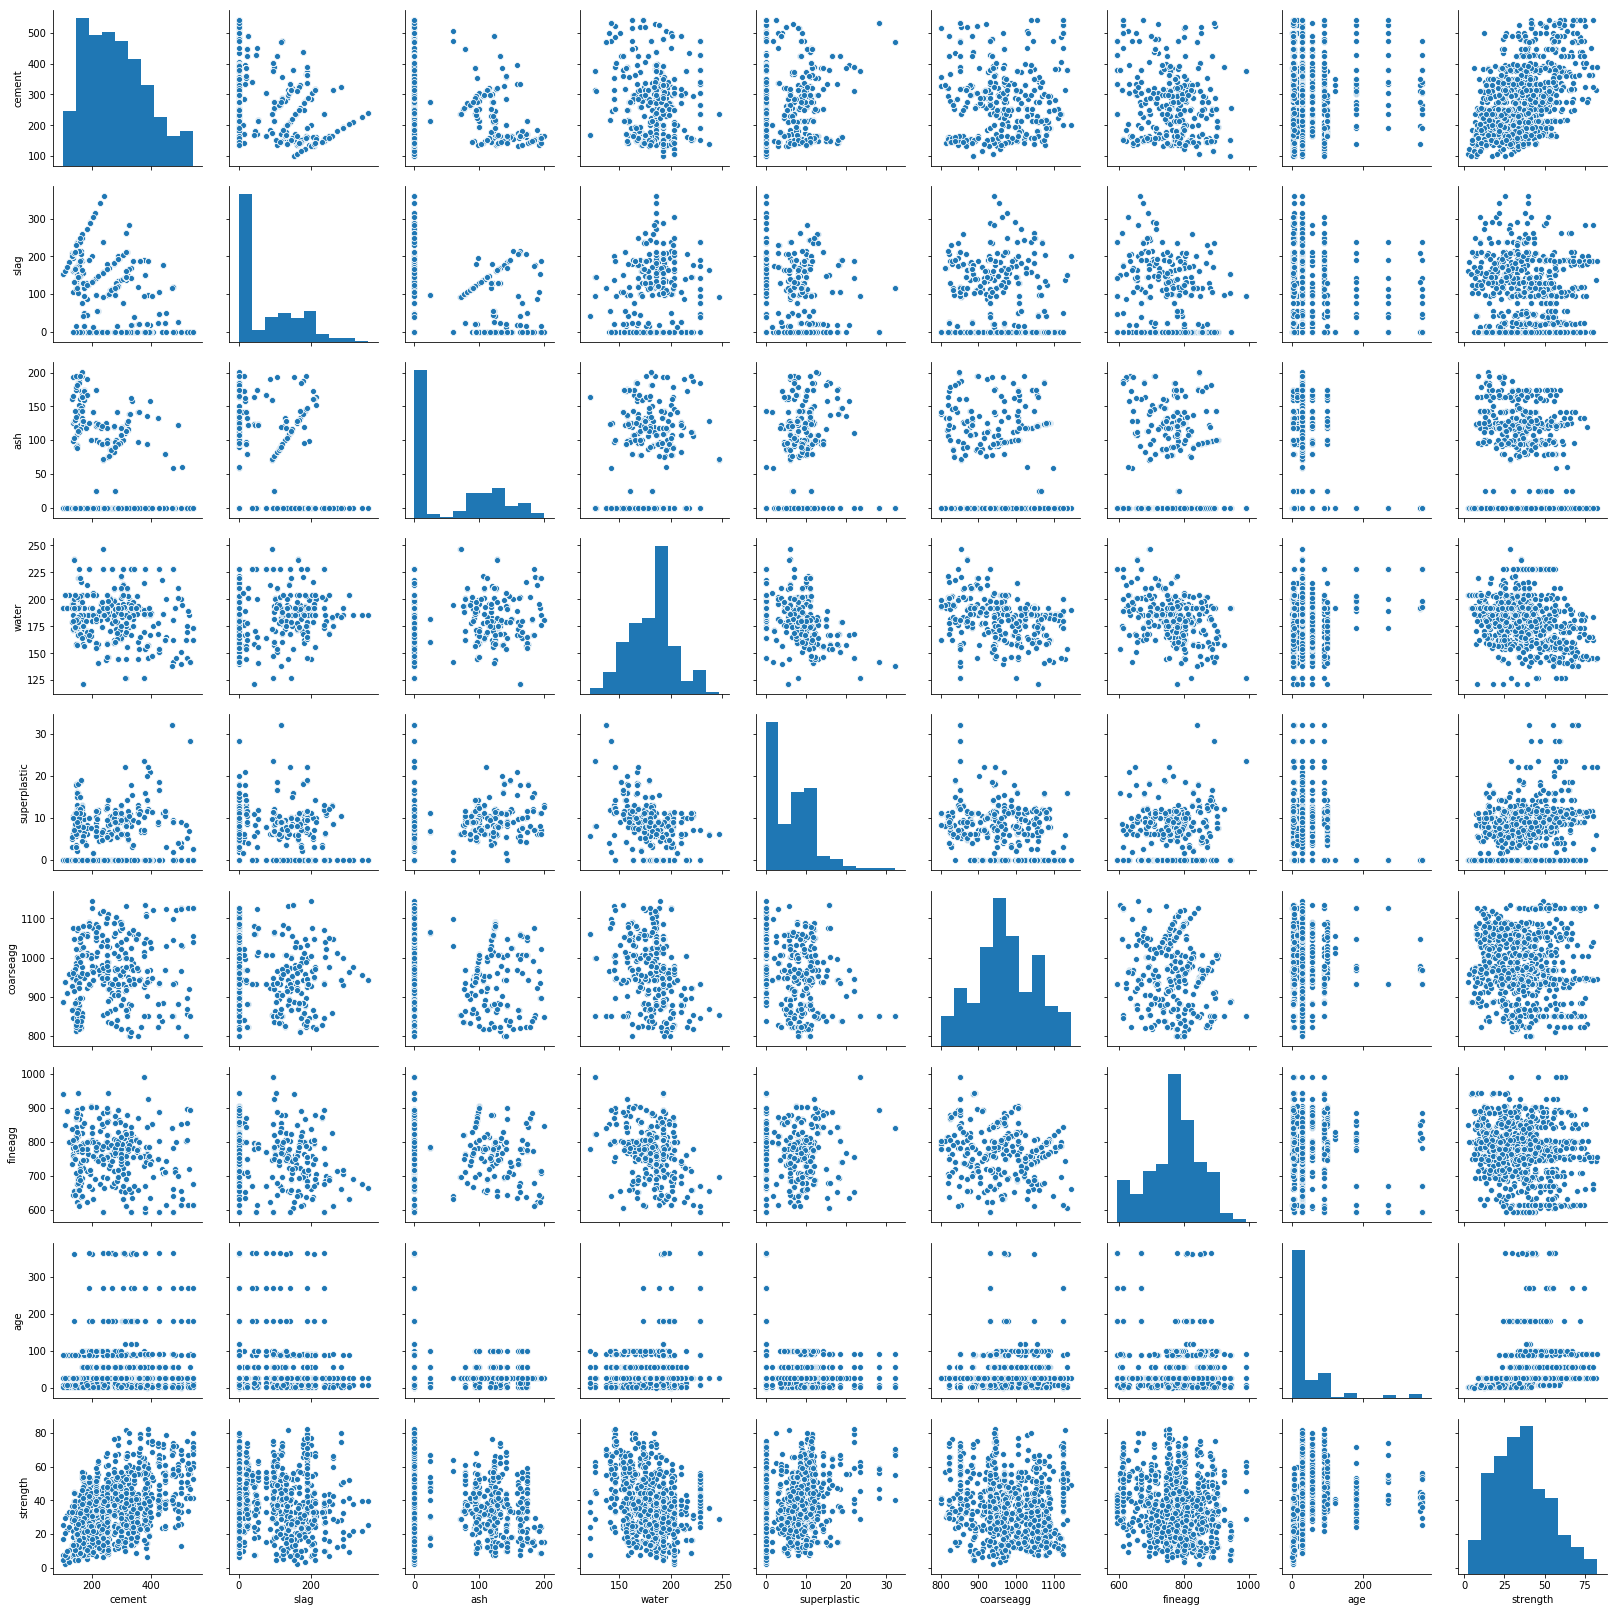

In [44]:
sns.pairplot(conc)
plt.show()

In [45]:
corr = conc.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


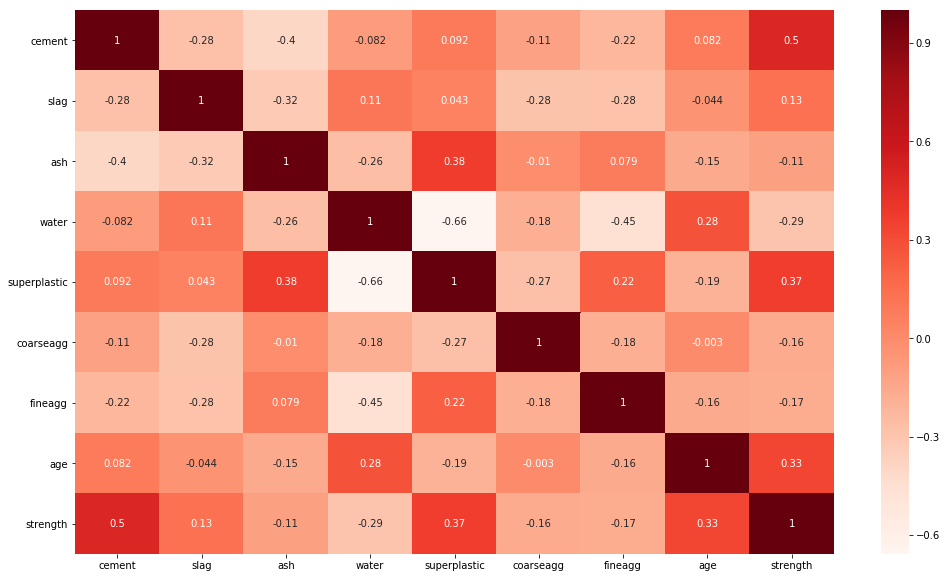

In [46]:
plt.subplots(figsize=(17,10))  
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [47]:
cor_target = abs(corr["strength"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

cement          0.497832
water           0.289633
superplastic    0.366079
age             0.328873
strength        1.000000
Name: strength, dtype: float64

In [0]:
most_effective = ['cement' ,'slag', 'water' ,'ash', 'superplastic' ,'age' ,'superplastic']

# Model Training 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/250px-Boxplot_vs_PDF.svg.png">

In [0]:
def remove_outlier(df_in, col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  return df_out

In [50]:
for i in most_effective:
    print(i)
    print(conc.count())     
    conc = remove_outlier(conc,i)
    print(conc.count())

cement
cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64
cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64
slag
cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64
cement          1028
slag            1028
ash             1028
water           1028
superplastic    1028
coarseagg       1028
fineagg         1028
age             1028
strength        1028
dtype: int64
water
cement          1028
slag            1028
ash             1028
water           1028
superplastic    1028
coarseagg       1028
fineagg         1028
age             1028
streng

In [51]:
conc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [52]:
X = conc[most_effective]
print(X.columns)
y = conc['strength'] 

Index(['cement', 'slag', 'water', 'ash', 'superplastic', 'age',
       'superplastic'],
      dtype='object')


In [53]:
for i in most_effective:
  print(y.count())

950
950
950
950
950
950
950


In [0]:
def score(y_pred, y_true):
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [57]:
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)

#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, y_test))



Lasso SCORE :  0.7854804274219107


In [58]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.1134604   0.08651657 -0.22100752  0.06477002  0.08080142  0.32485072
  0.08080142]
Intercept: 22.045405042907998
Root mean squared error:  64.5681151954358
R2 score:  0.7505366068640162


In [59]:
X = conc.loc[:, conc.columns != 'strength']
print(X.columns)
y = conc['strength']

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')


In [0]:
X = StandardScaler().fit_transform(X)
pca = PCA(.95)
X = pca.fit_transform(X) 

In [61]:
X

array([[-2.08677743,  1.05775183, -1.36223964, -0.09240293, -0.07027924,
        -0.86799142],
       [ 1.70163984, -0.78301231, -0.89243771,  0.97347161, -0.85080762,
        -0.80738636],
       [ 0.60768453, -0.46944277, -0.56132364, -1.12070751, -0.3456093 ,
         0.49735532],
       ...,
       [ 1.57844252, -0.1530735 , -1.6173355 ,  0.02918074, -0.47670045,
         0.82544451],
       [ 0.3755688 ,  1.29522386,  0.05492906, -0.02983279, -0.16174343,
         0.76982701],
       [-1.81301469, -2.52305835,  2.33890539,  1.75015503, -0.53034977,
         0.01980878]])

In [62]:
X[::,:5].shape

(950, 5)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [64]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 2.53521136  2.64861377  7.46562833  3.91878674 10.16973892  0.65955454]
Intercept: 35.28573686798796
Root mean squared error:  70.8754167589231
R2 score:  0.7261679096394353


In [65]:
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)

#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, y_test))



Lasso SCORE :  0.7854804274219107
